In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from vega_datasets import data

In [2]:
stock_data = data.stocks()
stock_data.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


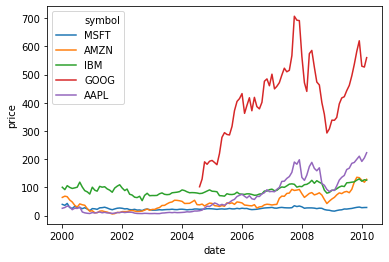

In [3]:
sns.lineplot(x='date', y='price', hue='symbol', data=stock_data)

plt.show()

In [4]:
stock_data_pivoted = stock_data.pivot(columns='symbol', index='date', values='price')
stock_data_pivoted.head()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,25.94,64.56,NaN,100.52,39.81
2000-02-01,28.66,68.87,NaN,92.11,36.35
2000-03-01,33.95,67.00,NaN,106.11,43.22
2000-04-01,31.01,55.19,NaN,99.95,28.37
2000-05-01,21.00,48.31,NaN,96.31,25.45


In [5]:
tickers = stock_data_pivoted.columns
tickers

Index(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'], dtype='object', name='symbol')

In [6]:
stock_data_pivoted.reset_index(inplace=True)

In [7]:
stock_data_pivoted.head()

symbol,date,AAPL,AMZN,GOOG,IBM,MSFT
0,2000-01-01,25.94,64.56,NaN,100.52,39.81
1,2000-02-01,28.66,68.87,NaN,92.11,36.35
2,2000-03-01,33.95,67.00,NaN,106.11,43.22
3,2000-04-01,31.01,55.19,NaN,99.95,28.37
4,2000-05-01,21.00,48.31,NaN,96.31,25.45


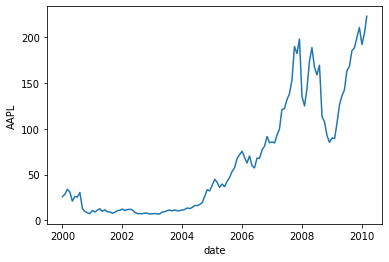

In [8]:
sns.lineplot(x='date', y='AAPL' , data=stock_data_pivoted)
plt.show()

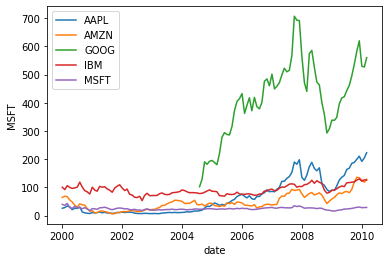

In [9]:
for ticker in tickers:
  sns.lineplot(x='date', y=ticker, data=stock_data_pivoted, label=ticker) 
plt.show()

In [10]:
stock_data_pivoted.head()

symbol,date,AAPL,AMZN,GOOG,IBM,MSFT
0,2000-01-01,25.94,64.56,NaN,100.52,39.81
1,2000-02-01,28.66,68.87,NaN,92.11,36.35
2,2000-03-01,33.95,67.00,NaN,106.11,43.22
3,2000-04-01,31.01,55.19,NaN,99.95,28.37
4,2000-05-01,21.00,48.31,NaN,96.31,25.45


In [11]:
stock_data_melted = stock_data_pivoted.melt(id_vars='date')
stock_data_melted.head()

,date,symbol,value
0,2000-01-01,AAPL,25.94
1,2000-02-01,AAPL,28.66
2,2000-03-01,AAPL,33.95
3,2000-04-01,AAPL,31.01
4,2000-05-01,AAPL,21.00


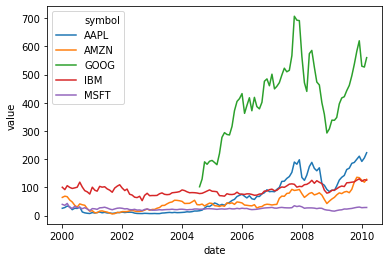

In [12]:
sns.lineplot(x='date', y='value', hue='symbol', data=stock_data_melted)
plt.show()

In [13]:
sp_data = data.sp500()
sp_data.head()

,date,price
0,2000-01-01,1394.46
1,2000-02-01,1366.42
2,2000-03-01,1498.58
3,2000-04-01,1452.43
4,2000-05-01,1420.60


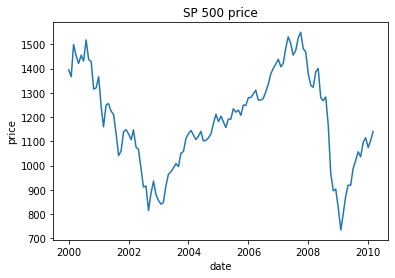

In [14]:
sns.lineplot(x='date', y='price', data=sp_data)
plt.title('SP 500 price')
plt.show()

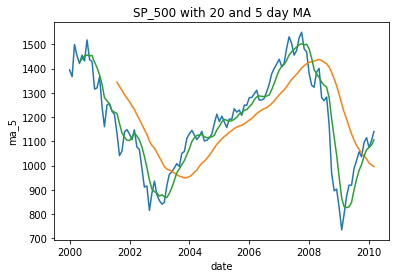

In [15]:
sp_data['ma_20'] = sp_data.price.rolling(20).mean()
sp_data['ma_5'] = sp_data.price.rolling(5).mean()

sns.lineplot(x='date', y='price', data=sp_data)
sns.lineplot(x='date', y='ma_20', data=sp_data)
sns.lineplot(x='date', y='ma_5', data=sp_data)

plt.title('SP_500 with 20 and 5 day MA')
plt.show()

In [16]:
stock_data_pivoted.index = stock_data_pivoted.date
stock_data_pivoted.pop('date')

date
2000-01-01   2000-01-01
2000-02-01   2000-02-01
2000-03-01   2000-03-01
2000-04-01   2000-04-01
2000-05-01   2000-05-01
                ...    
2009-11-01   2009-11-01
2009-12-01   2009-12-01
2010-01-01   2010-01-01
2010-02-01   2010-02-01
2010-03-01   2010-03-01
Name: date, Length: 123, dtype: datetime64[ns]

In [17]:
stock_data_pivoted.tail()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2009-11-01,199.91,135.91,583.00,125.79,29.27
2009-12-01,210.73,134.52,619.98,130.32,30.34
2010-01-01,192.06,125.41,529.94,121.85,28.05
2010-02-01,204.62,118.40,526.80,127.16,28.67
2010-03-01,223.02,128.82,560.19,125.55,28.80


In [18]:
stock_daily_return = stock_data_pivoted.pct_change()
stock_daily_return.tail()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2009-11-01,0.060531,0.143927,0.087443,0.052284,0.065138
2009-12-01,0.054124,-0.010227,0.063431,0.036012,0.036556
2010-01-01,-0.088597,-0.067722,-0.145230,-0.064994,-0.075478
2010-02-01,0.065396,-0.055897,-0.005925,0.043578,0.022103
2010-03-01,0.089923,0.088007,0.063383,-0.012661,0.004534


In [20]:
stocks_cum_sum = stock_daily_return.cumsum()

In [21]:
stocks_cum_sum.head()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.104857,0.066760,NaN,-0.083665,-0.086913
2000-03-01,0.289435,0.039607,NaN,0.068327,0.102083
2000-04-01,0.202837,-0.136662,NaN,0.010274,-0.241508
2000-05-01,-0.119962,-0.261322,NaN,-0.026144,-0.344434


In [22]:
stocks_cum_sum.reset_index(inplace=True)
stocks_cum_sum_melted =  stocks_cum_sum.melt(id_vars='date')
stocks_cum_sum_melted.head()

,date,symbol,value
0,2000-01-01,AAPL,NaN
1,2000-02-01,AAPL,0.104857
2,2000-03-01,AAPL,0.289435
3,2000-04-01,AAPL,0.202837
4,2000-05-01,AAPL,-0.119962


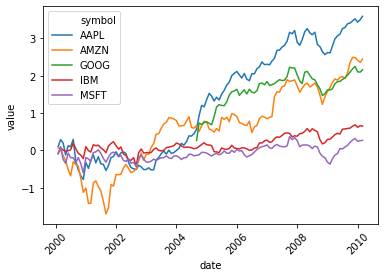

In [23]:
sns.lineplot(x='date', y='value', hue='symbol', data=stocks_cum_sum_melted)
plt.xticks(rotation=45)
plt.show()

In [24]:
correlation_table = stocks_cum_sum.corr()
correlation_table

symbol,AAPL,AMZN,GOOG,IBM,MSFT
symbol,,,,,
AAPL,1.000000,0.886667,0.919944,0.820909,0.764572
AMZN,0.886667,1.000000,0.764208,0.791895,0.675291
GOOG,0.919944,0.764208,1.000000,0.717876,0.675317
IBM,0.820909,0.791895,0.717876,1.000000,0.784510
MSFT,0.764572,0.675291,0.675317,0.784510,1.000000


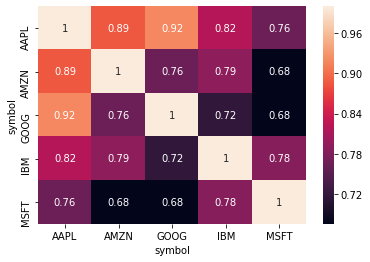

In [26]:
sns.heatmap(correlation_table, annot=True)
plt.show()

In [27]:
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


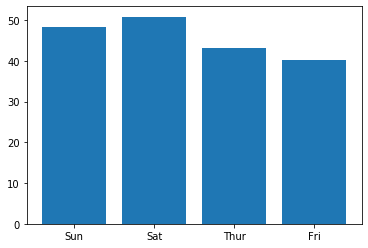

In [28]:
plt.bar(tips_data.day, tips_data.total_bill)
plt.show()

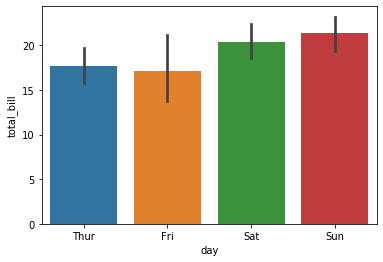

In [29]:
sns.barplot(x='day', y='total_bill', data=tips_data)
plt.show()

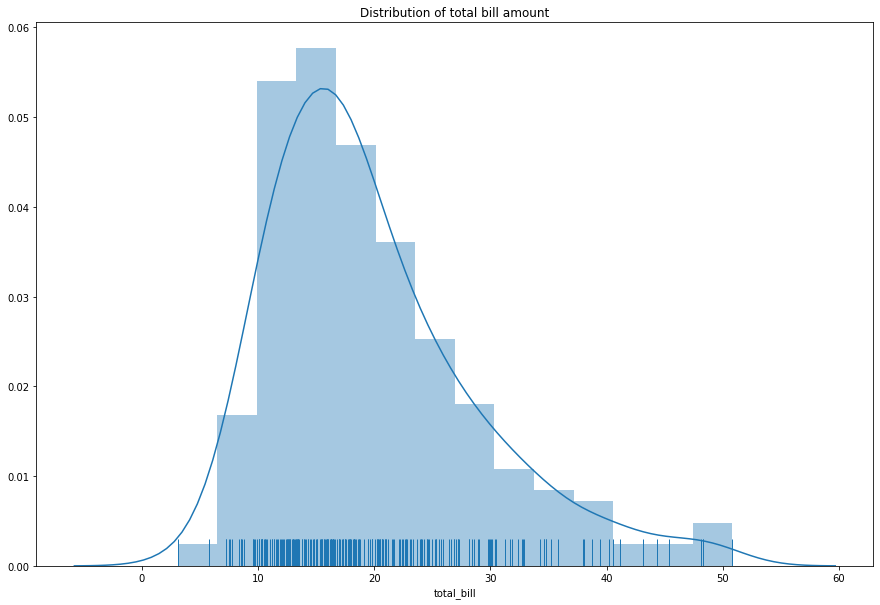

In [30]:
plt.figure(figsize=(15, 10))
sns.distplot(tips_data.total_bill, kde=True, rug=True)
plt.title('Distribution of total bill amount')
plt.show()